In [1]:
%matplotlib notebook
import numpy as np
from stingray.pulse.search import epoch_folding_search
import matplotlib.pyplot as plt
from stingray import Lightcurve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(


In [2]:
def sinusoid(times, frequency, baseline, amplitude, phase):
    return baseline + amplitude * np.sin(2 * np.pi * (frequency * times + phase))

In [25]:
# from stingray import Lightcurve

period = 300000.203501
mean_countrate = 50
pulsed_fraction = 0.0
bin_time = 0.01
obs_length = 3000

t = np.arange(0, obs_length, bin_time)

# The continuous light curve
counts = sinusoid(t, 1 / period, mean_countrate,
                  0.5 * mean_countrate * pulsed_fraction, 0) * bin_time
lc = Lightcurve(t, counts, gti=[[-bin_time / 2, obs_length + bin_time / 2]],
                dt=bin_time)

In [28]:
# from stingray.events import EventList

# use the light curve above to simulate an event list for this pulsar.
events = EventList()
events.simulate_times(lc)

In [27]:
plt.plot(lc.time, lc.counts)
plt.ylim(0,1)

(0.0, 1.0)

In [5]:
import sys
sys.path.insert(0, '..')
from ef_search import search

<IPython.core.display.Javascript object>


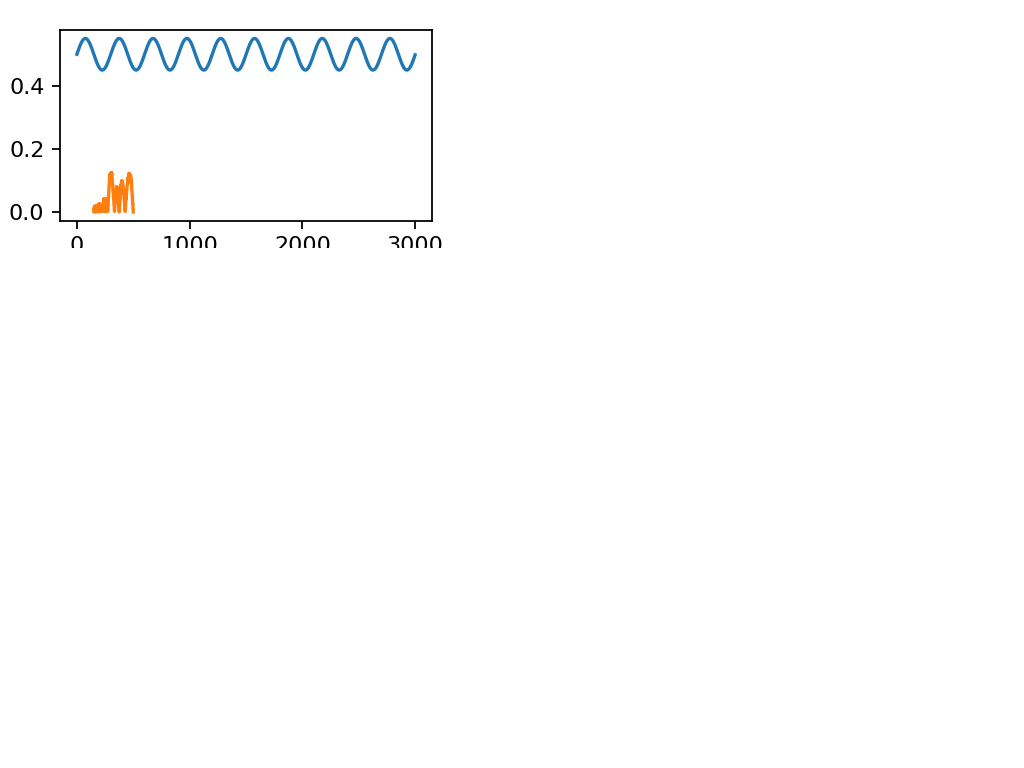

In [29]:
times = events.time
periods, chi2 = search(times, 150, 500)

In [14]:
# period = 100
# nbins = 20
# folded = np.histogram(times%period/period, bins=nbins, range=(0,1))[0]
# expected = len(times)/nbins
# np.sum((folded-expected)**2/expected**2)

1.5350104149975965

<IPython.core.display.Javascript object>


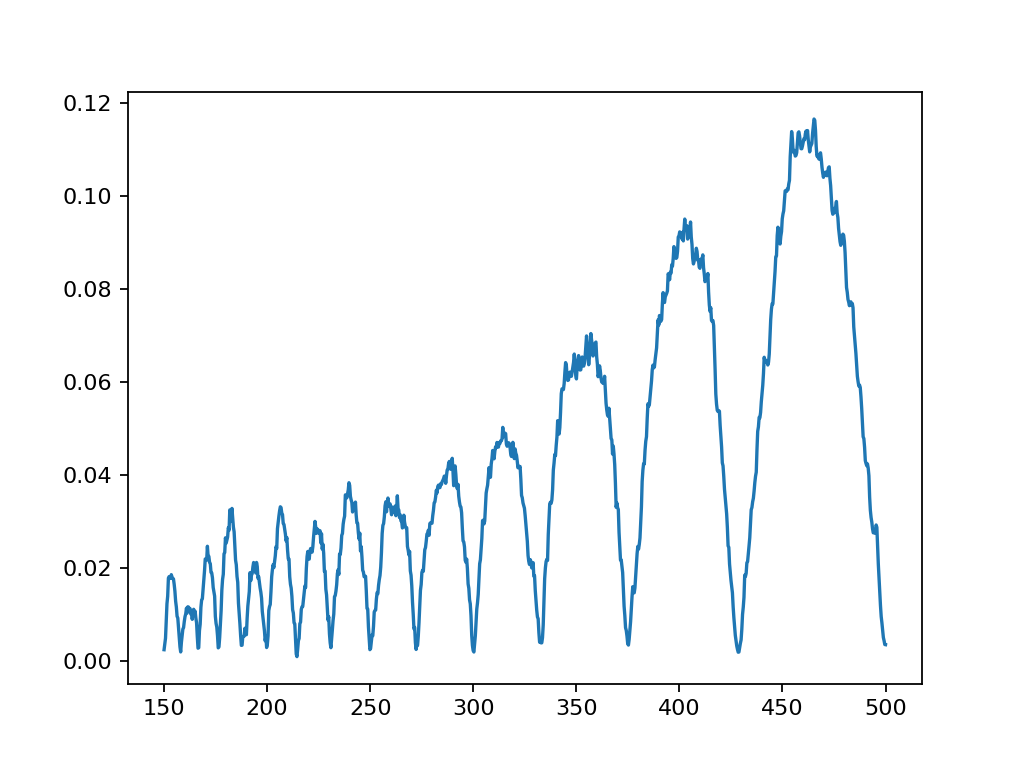

In [30]:
#  = np.linspace(150, 500, 1000)
plt.plot(periods, chi2)

In [16]:
len(times)

158